In [2]:
from psycopg2 import connect
import psycopg2.sql as pg
import configparser
import datetime
#this is to allow you to see the plot in the notebook
%matplotlib inline 
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import date2num 
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
def print_table(sql, con):
    return HTML(pandasql.read_sql(sql, con).to_html(index=False))

In [3]:
CONFIG = configparser.ConfigParser()
CONFIG.read(r'/home/jchew/local/db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

# Plot cycling volumes to get a big picture first

### intersection_uid and its information can be found [here](https://github.com/CityofToronto/bdit_data-sources/blob/miovision_api_bugfix/volumes/miovision/geojson/miovision_intersections_updated.geojson)

In [11]:
with con:   
    sql = pg.SQL('''
SELECT * FROM miovision_api.volumes_15min_tmc
WHERE intersection_uid = 33
AND classification_uid = 2
    ''')
    data_int_33 = pandasql.read_sql(sql, con)


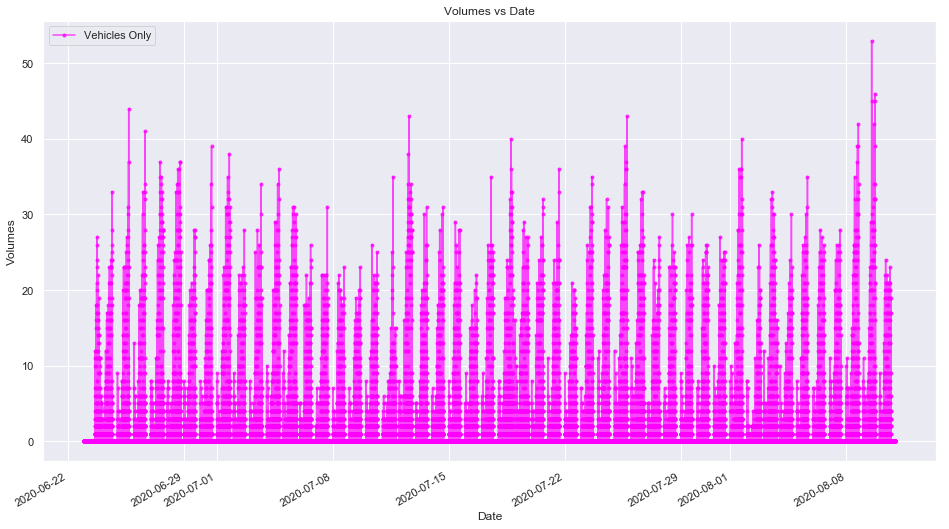

In [12]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
NUM_COLORS = 1
cm = plt.get_cmap('spring')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

ax.plot(data_int_33.datetime_bin, data_int_33.volume, marker='o', markersize=3, alpha=0.7,
            linestyle='-', label="Vehicles Only", color=colors[0])

#ax.xaxis_date()
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlabel('Date')
ax.set_ylabel('Volumes')
ax.set_title('Volumes vs Date')

ax.legend()
plt.gcf().autofmt_xdate()

In [4]:
with con:   
    sql = pg.SQL('''
SELECT * FROM miovision_api.volumes_15min
WHERE intersection_uid > 32
AND classification_uid = 2
    ''')
    all_bikes = pandasql.read_sql(sql, con)

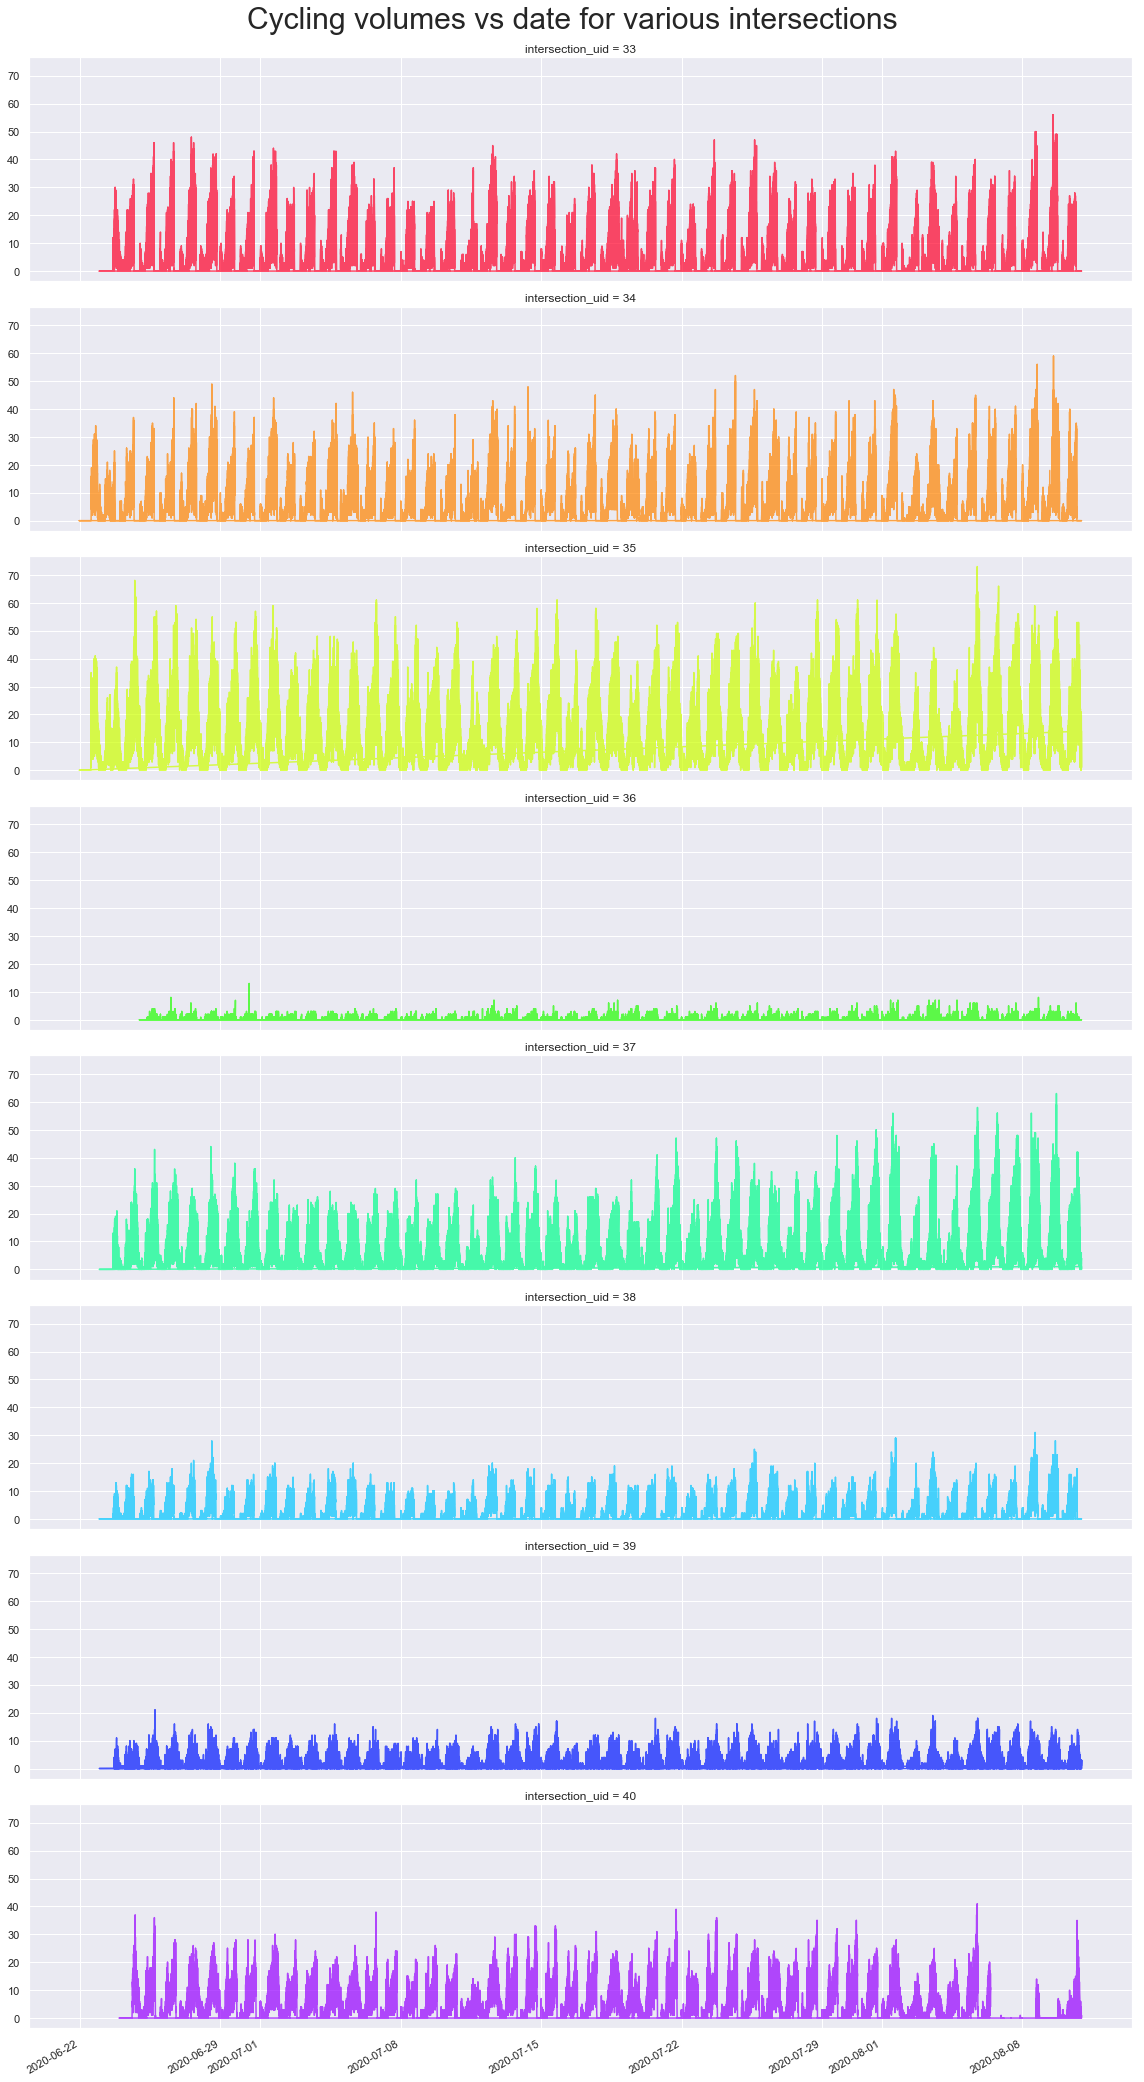

In [23]:
fig, ax = plt.subplots(8,1,figsize=(16,36), sharex=True, sharey=True)
NUM_COLORS = 8
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

groups = all_bikes.groupby('intersection_uid')
for i, (intersection_uid, data) in enumerate(groups):
    ax[i].plot(data.datetime_bin, data.volume, #marker = 'o', markersize = 3,
            alpha = 0.7, linestyle = '-', label = intersection_uid, color = colors[i])
    ax[i].title.set_text('intersection_uid = ' + str(intersection_uid))

#fig.subplots_adjust(top=0.85)
fig.tight_layout(rect=[0, 0.03, 1, 0.97]) # to remove the big blank space between suptitle and plot title
plt.suptitle('Cycling volumes vs date for various intersections', size = 30)
plt.gcf().autofmt_xdate()    

# Plot cycling volumes for each intersection (ATR volumes for the 4 directions) 

In [26]:
with con:   
    sql = pg.SQL('''
SELECT * FROM miovision_api.volumes_15min
WHERE intersection_uid = 33
AND classification_uid = 2
    ''')
    bikes_33 = pandasql.read_sql(sql, con)
    
# print_table(sql, con)

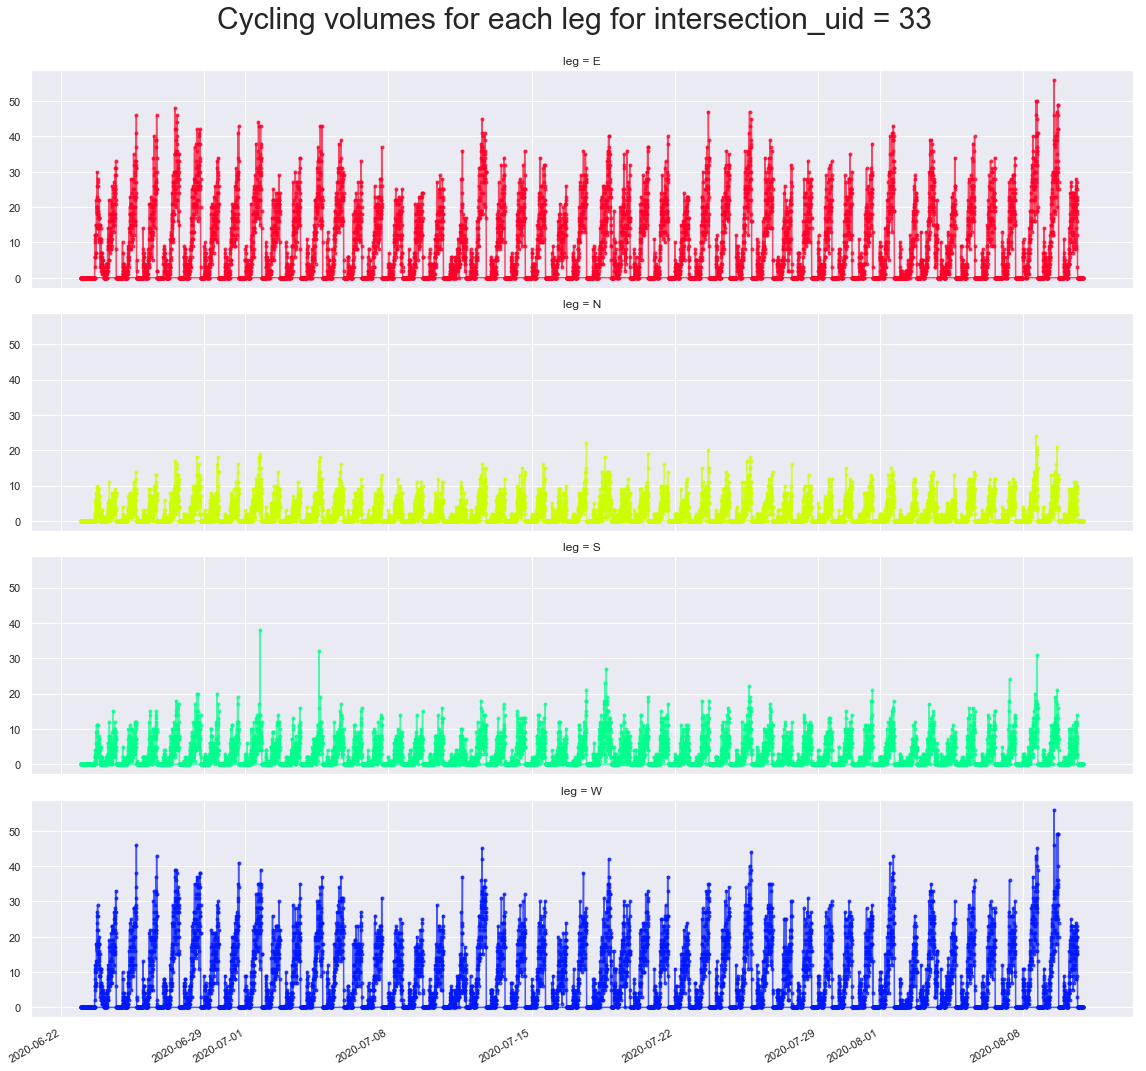

In [30]:
fig, ax = plt.subplots(4,1,figsize=(16,18), sharex=True, sharey=True)
NUM_COLORS = 4
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

groups = bikes_33.groupby('leg')
for i, (leg, data) in enumerate(groups):
    ax[i].plot(data.datetime_bin, data.volume, marker = 'o', markersize = 3,
            alpha = 0.7, linestyle = '-', label = leg, color = colors[i])
    ax[i].title.set_text('leg = ' + str(leg))

#fig.subplots_adjust(top=0.85)
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # to remove the big blank space between suptitle and plot title
plt.suptitle('Cycling volumes for each leg for intersection_uid = 33', size = 30)
plt.gcf().autofmt_xdate()    

# Plot volumes of cars and bikes with locations along the same street (Bloor/Danforth)

Direction from west to east:

Intersection_uid: 35 -> 33 -> 34 -> 37 -> 38 -> 39

Intersection_name: Bloor/Shaw -> Bloor/Avenue -> Bloor/Sherbourne -> Danforth/Jones -> Danforth/Woodbine -> Danforth/Dawes

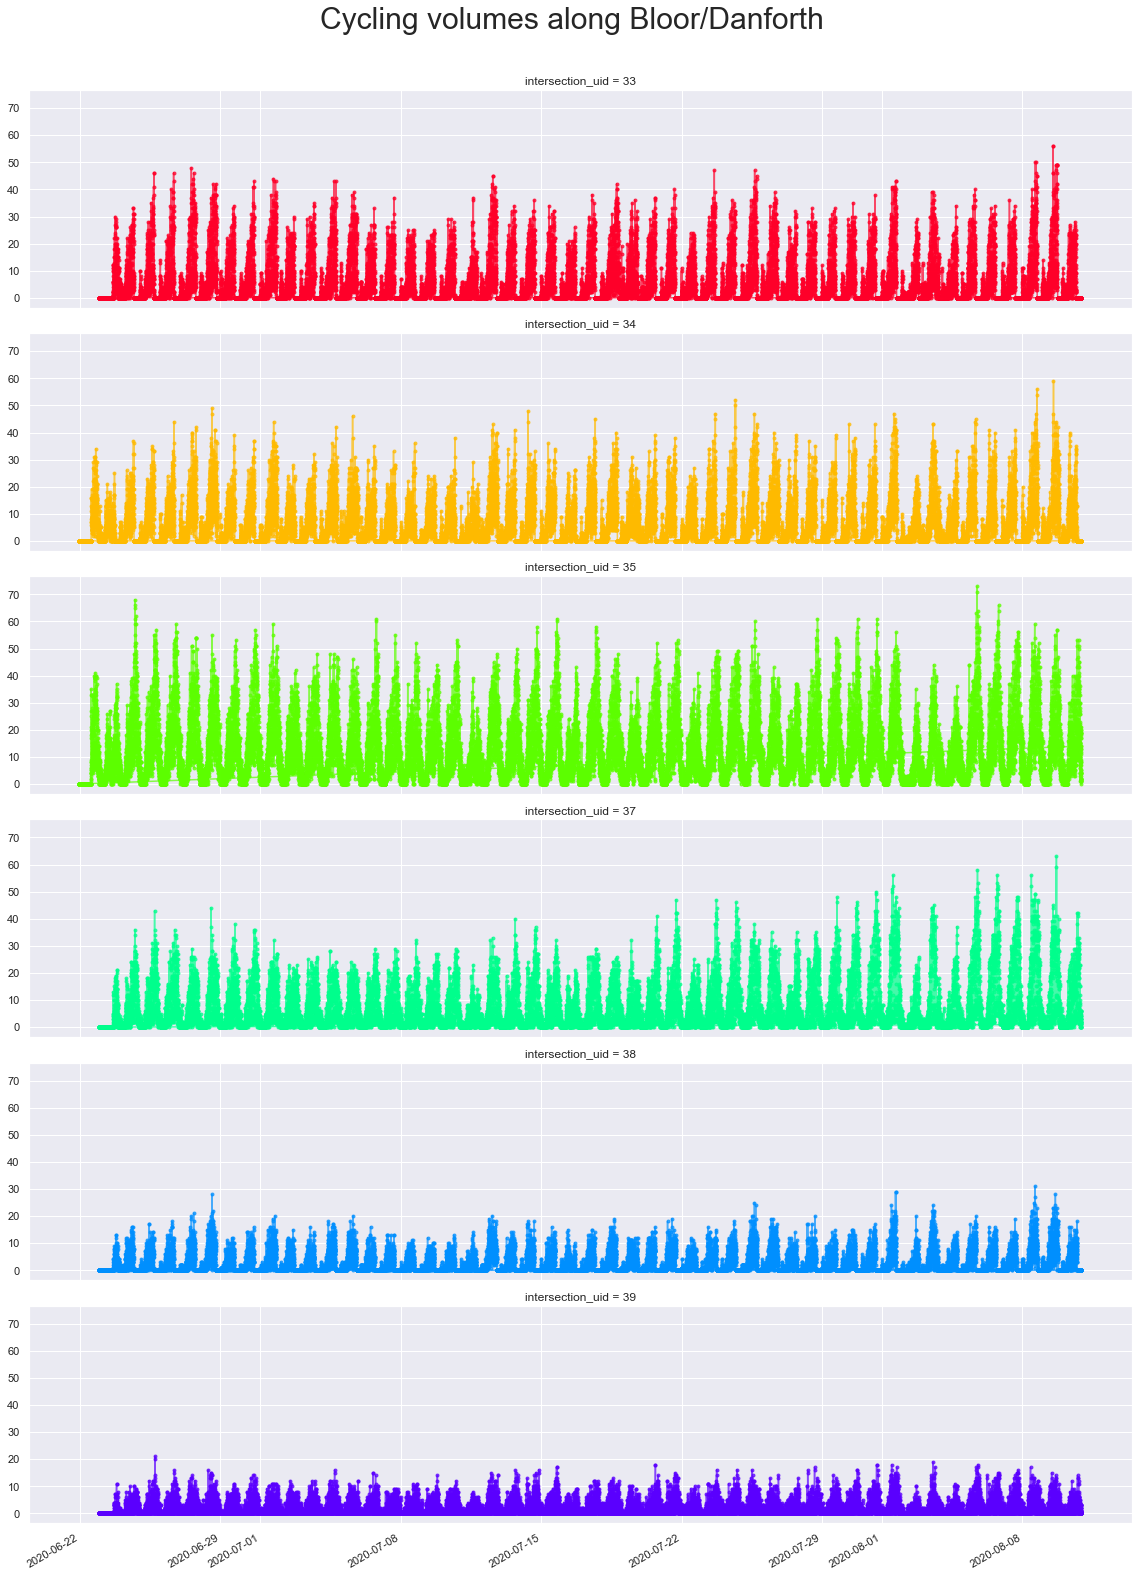

In [35]:
with con:   
    sql = pg.SQL('''
SELECT * FROM miovision_api.volumes_15min
WHERE intersection_uid IN (33,34,35,37,38,39)
AND classification_uid IN (2)
    ''')
    bloor_danforth_bikes = pandasql.read_sql(sql, con)  
    
fig, ax = plt.subplots(6,1,figsize=(16,27), sharex=True, sharey=True)
NUM_COLORS = 6
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

groups = bloor_danforth_bikes.groupby('intersection_uid')
for i, (intersection_uid, data) in enumerate(groups):
    ax[i].plot(data.datetime_bin, data.volume, marker = 'o', markersize = 3,
            alpha = 0.7, linestyle = '-', label = intersection_uid, color = colors[i])
    ax[i].title.set_text('intersection_uid = ' + str(intersection_uid))

fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # to remove the big blank space between suptitle and plot title
plt.suptitle('Cycling volumes along Bloor/Danforth', size = 30)
plt.gcf().autofmt_xdate() 

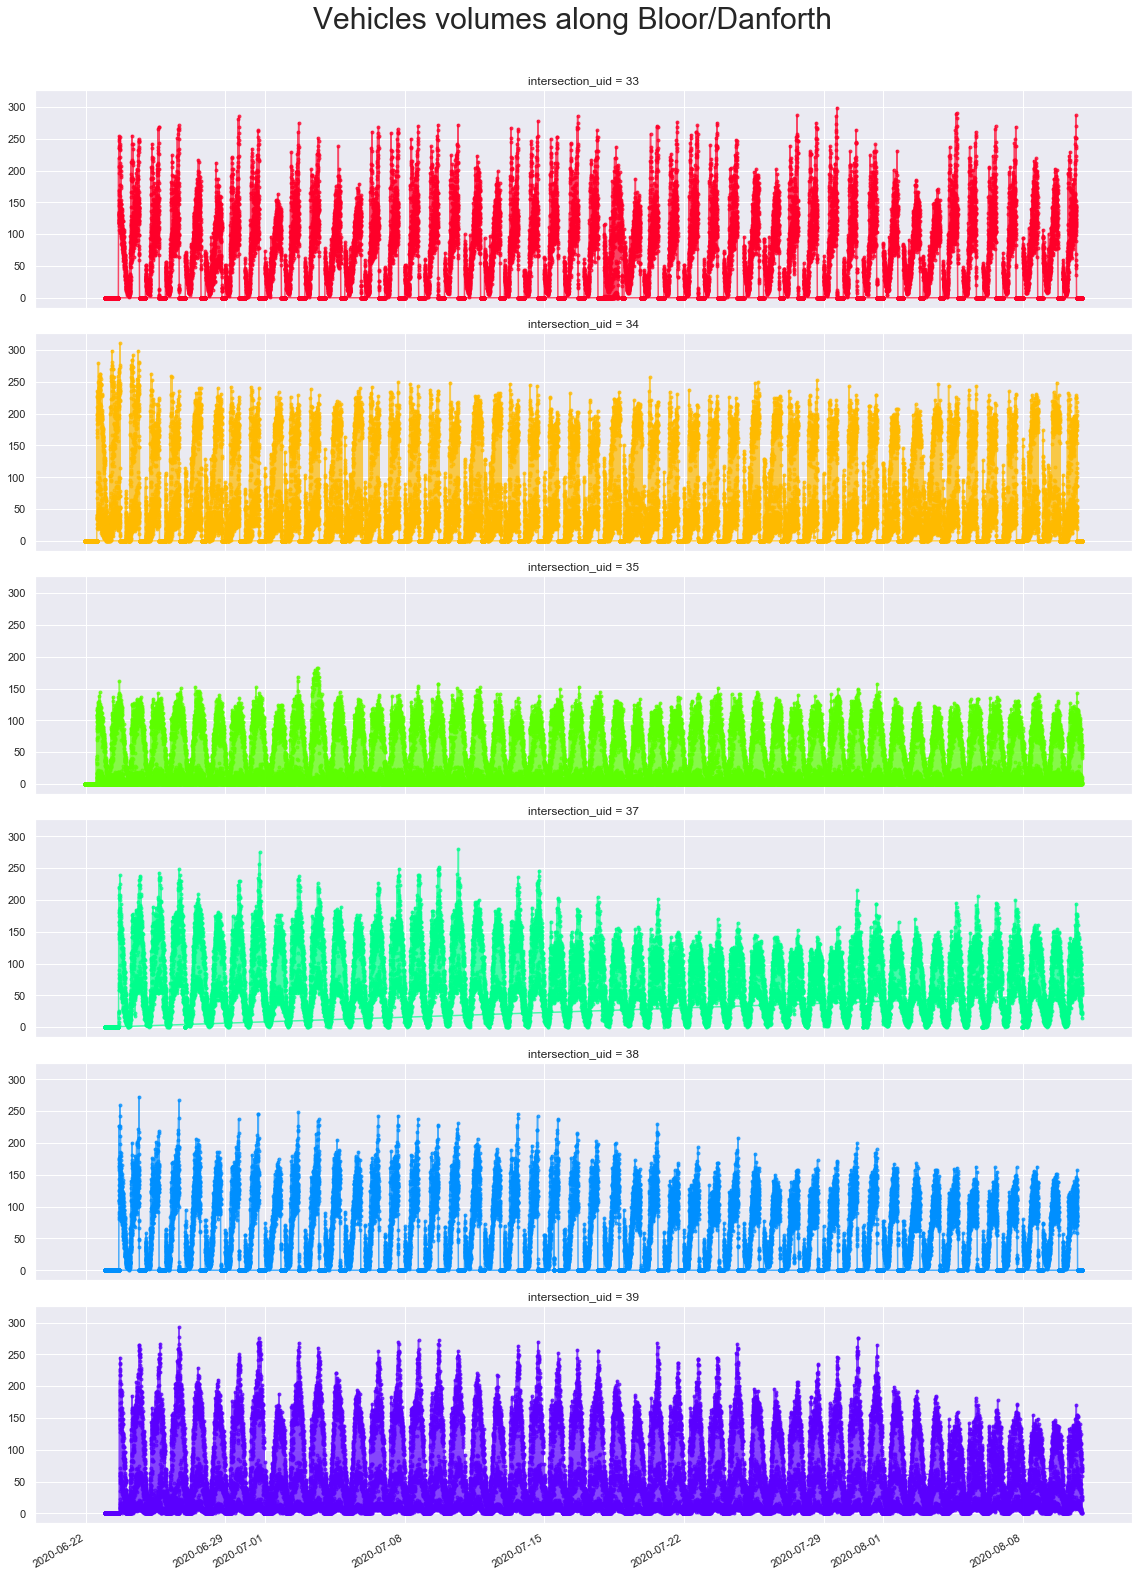

In [36]:
with con:   
    sql = pg.SQL('''
SELECT * FROM miovision_api.volumes_15min
WHERE intersection_uid IN (33,34,35,37,38,39)
AND classification_uid IN (1)
    ''')
    bloor_danforth_cars = pandasql.read_sql(sql, con)  
    
fig, ax = plt.subplots(6,1,figsize=(16,27), sharex=True, sharey=True)
NUM_COLORS = 6
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

groups = bloor_danforth_cars.groupby('intersection_uid')
for i, (intersection_uid, data) in enumerate(groups):
    ax[i].plot(data.datetime_bin, data.volume, marker = 'o', markersize = 3,
            alpha = 0.7, linestyle = '-', label = intersection_uid, color = colors[i])
    ax[i].title.set_text('intersection_uid = ' + str(intersection_uid))

fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # to remove the big blank space between suptitle and plot title
plt.suptitle('Vehicles volumes along Bloor/Danforth', size = 30)
plt.gcf().autofmt_xdate() 

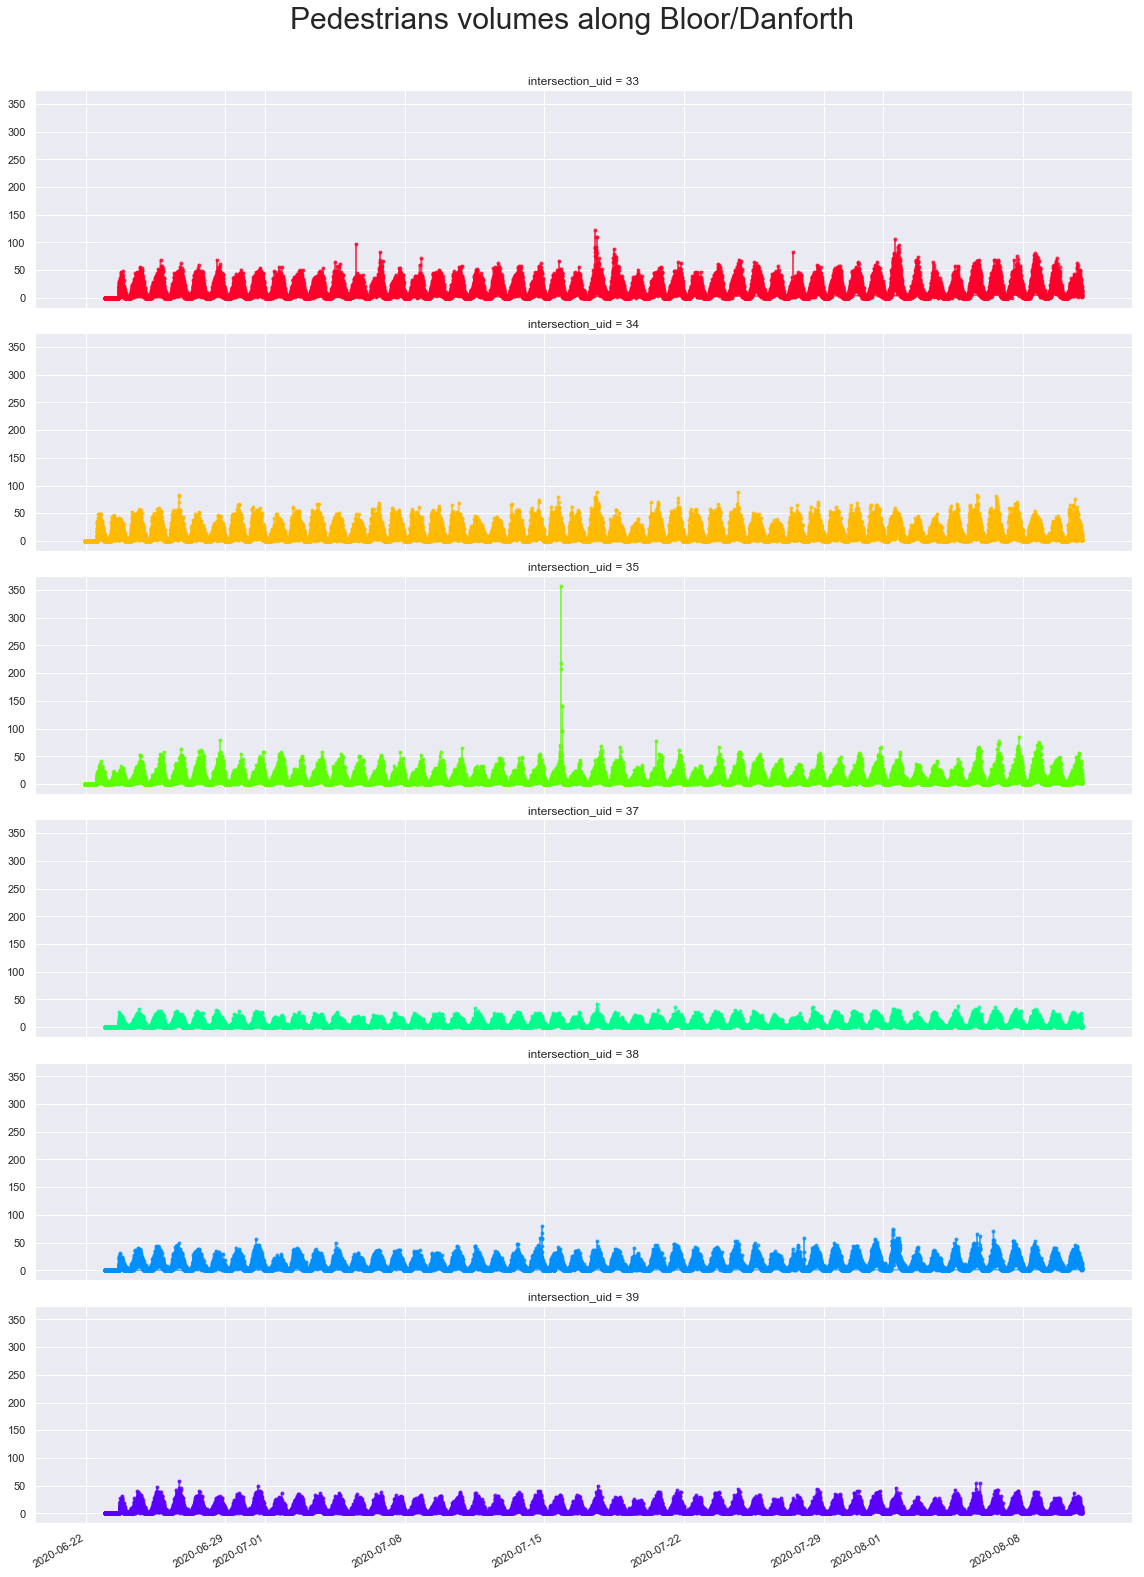

In [37]:
with con:   
    sql = pg.SQL('''
SELECT * FROM miovision_api.volumes_15min
WHERE intersection_uid IN (33,34,35,37,38,39)
AND classification_uid IN (6)
    ''')
    bloor_danforth_ppl = pandasql.read_sql(sql, con)  
    
fig, ax = plt.subplots(6,1,figsize=(16,27), sharex=True, sharey=True)
NUM_COLORS = 6
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

groups = bloor_danforth_ppl.groupby('intersection_uid')
for i, (intersection_uid, data) in enumerate(groups):
    ax[i].plot(data.datetime_bin, data.volume, marker = 'o', markersize = 3,
            alpha = 0.7, linestyle = '-', label = intersection_uid, color = colors[i])
    ax[i].title.set_text('intersection_uid = ' + str(intersection_uid))

fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # to remove the big blank space between suptitle and plot title
plt.suptitle('Pedestrians volumes along Bloor/Danforth', size = 30)
plt.gcf().autofmt_xdate() 

Based on above plot, intersection_uid = 35 (Bloor/Shaw) seems to have exceptionally high pedestrians volume on 2020-07-15 in the N/S leg in the EB direction between 19:45:00 and 21:30:00 but the volume is not continuous though. Look at below table. 

In [38]:
with con:   
    sql = pg.SQL('''
SELECT * FROM miovision_api.volumes_15min
WHERE intersection_uid IN (35)
AND classification_uid IN (6)
AND dir = 'EB'
AND datetime_bin BETWEEN '2020-07-15 19:45:00' AND '2020-07-15 21:30:00'
ORDER BY datetime_bin, leg
    ''')
    
print_table(sql, con)

volume_15min_uid,intersection_uid,datetime_bin,classification_uid,leg,dir,volume
210247629,35,2020-07-15 19:45:00,6,N,EB,357.0
210247631,35,2020-07-15 19:45:00,6,S,EB,207.0
210247657,35,2020-07-15 20:00:00,6,N,EB,42.0
210247659,35,2020-07-15 20:00:00,6,S,EB,219.0
210247687,35,2020-07-15 20:15:00,6,N,EB,43.0
210247689,35,2020-07-15 20:15:00,6,S,EB,38.0
210247713,35,2020-07-15 20:30:00,6,N,EB,66.0
210247715,35,2020-07-15 20:30:00,6,S,EB,28.0
210247743,35,2020-07-15 20:45:00,6,N,EB,141.0
210247745,35,2020-07-15 20:45:00,6,S,EB,28.0
